### Data Preparation


In [ ]:
# Enter your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
df = pd.read_excel('Manufacturing_Machine_Data_Clean.xlsx')

In [ ]:
df.shape

(31656, 22)

In [ ]:
df.head(10)

,Location,Start Date,Start Time,End Time,End Date,Ticket,ticketstatus,Press,Press Group,Company,...,Good Footage,Total Footage,Total Hours,Run Hours,Labels Produced,Uptime %,Changeover %,Planned Downtime,Feet / Hour,Avg Line Speed
0,Facility1,2021-11-10,12:27:20,14:04:22,2021-11-10,244736,Done,Press_Type4,Press_Type4,Customer3,...,0.0,1000.0,1.62,NaN,0,NaN,1.0,NaN,0.000000,0.000000
1,Facility1,2021-11-10,15:46:05,15:49:12,2021-11-10,244736,Done,Press_Type4,Press_Type4,Customer3,...,0.0,500.0,0.05,NaN,0,NaN,1.0,NaN,0.000000,0.000000
2,Facility1,2021-11-10,14:04:28,15:46:00,2021-11-10,244736,Done,Press_Type4,Press_Type4,Customer3,...,0.0,NaN,1.70,NaN,0,NaN,NaN,NaN,0.000000,0.000000
3,Facility1,2021-11-02,10:02:41,11:28:29,2021-11-02,243359,Open,Press_Type1,Press_Group3,Customer4,...,4500.0,4800.0,1.43,1.43,38400,1.0,NaN,NaN,3146.853147,52.447552
4,Facility1,2021-11-02,15:44:45,15:45:00,2021-11-02,243538,Done,Press_Type1,Press_Group3,Customer4,...,0.0,1000.0,0.02,NaN,0,NaN,1.0,NaN,0.000000,0.000000
5,Facility1,2021-11-02,08:59:47,10:02:36,2021-11-02,243359,Open,Press_Type1,Press_Group3,Customer4,...,0.0,1000.0,1.05,NaN,0,NaN,1.0,NaN,0.000000,0.000000
6,Facility1,2021-11-02,12:51:20,13:51:15,2021-11-02,243538,Done,Press_Type1,Press_Group3,Customer4,...,0.0,500.0,1.00,NaN,0,NaN,1.0,NaN,0.000000,0.000000
7,Facility1,2021-11-02,11:29:18,12:51:16,2021-11-02,243359,Open,Press_Type1,Press_Group3,Customer4,...,0.0,NaN,1.37,NaN,0,NaN,1.0,NaN,0.000000,0.000000
8,Facility1,2021-11-02,14:01:19,15:44:41,2021-11-02,243538,Done,Press_Type1,Press_Group3,Customer4,...,0.0,NaN,1.72,NaN,0,NaN,NaN,NaN,0.000000,0.000000
9,Facility1,2021-11-02,07:32:55,08:59:43,2021-11-02,243359,Open,Press_Type1,Press_Group3,Customer4,...,0.0,NaN,1.45,NaN,0,NaN,NaN,NaN,0.000000,0.000000


In [ ]:
# Enter your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31656 entries, 0 to 31655
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Location          31656 non-null  object        
 1   Start Date        31656 non-null  datetime64[ns]
 2   Start Time        31656 non-null  object        
 3   End Time          31656 non-null  object        
 4   End Date          31633 non-null  datetime64[ns]
 5   Ticket            31656 non-null  object        
 6   ticketstatus      31656 non-null  object        
 7   Press             31656 non-null  object        
 8   Press Group       31656 non-null  object        
 9   Company           31656 non-null  object        
 10  Operator Name     31602 non-null  object        
 11  Operation         31656 non-null  object        
 12  Good Footage      31569 non-null  float64       
 13  Total Footage     13326 non-null  float64       
 14  Total Hours       3163

In [ ]:
# First I am going to take the important columns
important_cols = ['Operator Name', 'Good Footage', 'Run Hours', 'Labels Produced', 'Total Hours', 'Operation', 'Press', 'Press Group', 'Feet / Hour']
df = df[important_cols]

In [ ]:
df.isnull().sum()

,0
Operator Name,54
Good Footage,87
Run Hours,22298
Labels Produced,0
Total Hours,23
Operation,0
Press,0
Press Group,0
Feet / Hour,9


In [ ]:
df = df.drop(columns=['Run Hours']) # Dropping run hours as it has almost 70% missing value

In [ ]:
# Handled missing values of rest of the attributes using simple imputer
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31656 entries, 0 to 31655
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Operator Name    31656 non-null  object 
 1   Good Footage     31656 non-null  float64
 2   Labels Produced  31656 non-null  object 
 3   Total Hours      31656 non-null  float64
 4   Operation        31656 non-null  object 
 5   Press            31656 non-null  object 
 6   Press Group      31656 non-null  object 
 7   Feet / Hour      31656 non-null  float64
dtypes: float64(3), object(5)
memory usage: 1.9+ MB


### Part 1. Support Vector Machine (SVM)

In [ ]:
num_cols1 = ['Total Hours', 'Feet / Hour']
df_model1 = df.copy()
target = 'Good Footage'

In [ ]:
# As there are too many 0's and numbers so I made this as binary classification
df_model1['Good Footage'] = (df_model1['Good Footage'] > 0).astype(int)

In [ ]:
le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df_model1[col] = le.fit_transform(df_model1[col].astype(str))
    le_dict[col] = le

In [ ]:
X = df_model1.drop(columns=[target])
y = df_model1[target]

In [ ]:
scalar = StandardScaler()
X[num_cols1] = scalar.fit_transform(X[num_cols1])


In [ ]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
svc = SVC(kernel='rbf', C=1, gamma='scale')
svc.fit(X_train, y_train)

SVC(C=1)

In [ ]:
y_pred = svc.predict(X_test)

In [ ]:
# Evaluation metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.9927345477519217
Precision: 0.9885856079404467
Recall   : 0.9774288518155054
F1 Score : 0.9829755736491488


In [ ]:
# Overfitting Check
y_train_pred = svc.predict(X_train)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy :", accuracy_score(y_test, y_pred))

# As training and testing accuracy is too close so there is no overfitting

Training Accuracy: 0.9935917685816147
Testing Accuracy : 0.9927345477519217


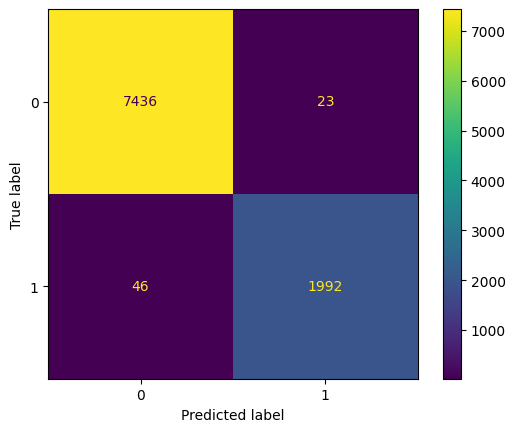

In [ ]:
# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot()
plt.show()

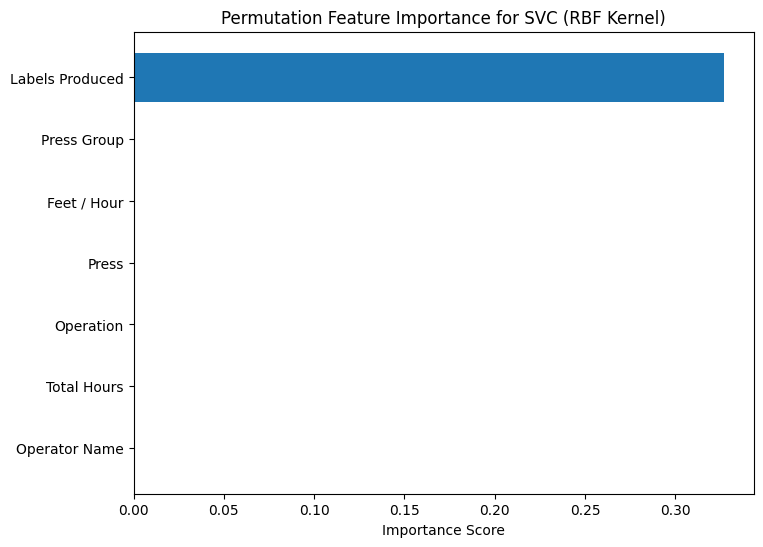

In [ ]:
# Feature importance for SVC
from sklearn.inspection import permutation_importance


result = permutation_importance(
    svc, X_test, y_test, n_repeats=10, random_state=42
)


importance = result.importances_mean
indices = np.argsort(importance)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importance[indices], align='center')
plt.yticks(range(len(indices)), X_test.columns[indices])
plt.xlabel("Importance Score")
plt.title("Permutation Feature Importance for SVC (RBF Kernel)")
plt.show()

### Part 2. XGBoost Model

In [ ]:
# Enter your code here:
df_model2 = df.copy()
le = LabelEncoder()


In [ ]:
# As there are too many 0's and numbers so I made this as binary classification
df_model2['Good Footage'] = (df_model2['Good Footage'] > 0).astype(int)

In [ ]:
for col in df_model2.select_dtypes(include=['object']):
    df_model2[col] = le.fit_transform(df_model2[col].astype(str))

In [ ]:
X1 = df_model2.drop(columns=['Good Footage'], axis = 1)
y1 = df_model2['Good Footage']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42) # Best split

In [ ]:
model = XGBClassifier(
    eval_metric="logloss",
    use_label_encoder=False
)
model.fit(X1_train, y1_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:31:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y1_pred = model.predict(X1_test)
y1_proba = model.predict_proba(X1_test)[:, 1]

In [ ]:
# Evaluation metrics
print("Accuracy :", accuracy_score(y1_test, y1_pred))
print("Precision:", precision_score(y1_test, y1_pred))
print("Recall   :", recall_score(y1_test, y1_pred))
print("F1 Score :", f1_score(y1_test, y1_pred))
print("ROC AUC  :", roc_auc_score(y1_test, y1_proba))

Accuracy : 0.9976834789933663
Precision: 0.9893203883495145
Recall   : 1.0
F1 Score : 0.9946315275744265
ROC AUC  : 0.9992783579347275


In [ ]:
# Overfitting Check
y1_train_pred = svc.predict(X1_train)

# Training metrics
train_accuracy1 = accuracy_score(y1_train, y1_train_pred)

print("Training Accuracy:", train_accuracy1)
print("Testing Accuracy :", accuracy_score(y1_test, y1_pred))

# As training and testing accuracy is not close so there is overfitting

Training Accuracy: 0.7989078929554583
Testing Accuracy : 0.9976834789933663


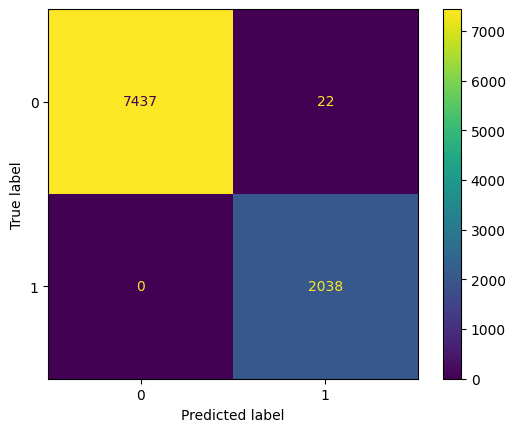

In [ ]:
# Plotting evaluation matrix
cm1 = confusion_matrix(y1_test, y1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=model.classes_)
disp1.plot()
plt.show()

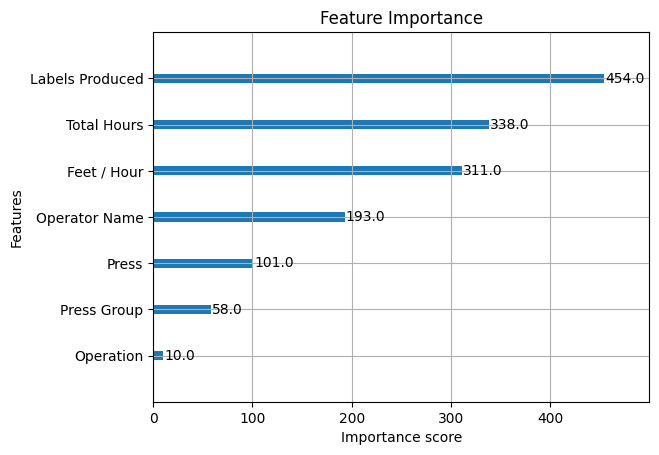

In [ ]:
# Feature importance
xgb.plot_importance(model)
plt.title("Feature Importance")
plt.show()

#Part 3. Artificial Neural Network (ANN) Model


In [ ]:
# Enter your code here:
df_model3 = df.copy()

In [ ]:
# As there are too many 0's and numbers so I made this as binary classification
df_model3['Good Footage'] = (df_model3['Good Footage'] > 0).astype(int)

In [ ]:
for col in df_model3.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_model3[col] = le.fit_transform(df_model3[col].astype(str))

In [ ]:
X2 = df_model3.drop(columns=['Good Footage'], axis = 1)
y2 = df_model3['Good Footage']

In [ ]:
num_cols2 = ['Total Hours', 'Feet / Hour']
scalar = StandardScaler()
X2[num_cols2] = scalar.fit_transform(X2[num_cols2])

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.3, random_state=42) # Best split

In [ ]:
model1 = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Overfitting prevention
es = EarlyStopping(
    patience=5,# Stops epoch as validation loss doesn't improve for 5 consecutive epochs
    restore_best_weights=True,
    monitor='val_loss'
)

In [ ]:
res = model1.fit(
    X2_train, y2_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8380 - loss: 2.0521 - val_accuracy: 0.9955 - val_loss: 0.2891
Epoch 2/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9931 - loss: 0.1385 - val_accuracy: 0.9955 - val_loss: 0.6532
Epoch 3/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9962 - loss: 0.2006 - val_accuracy: 0.9955 - val_loss: 0.5921
Epoch 4/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9964 - loss: 0.1663 - val_accuracy: 0.9955 - val_loss: 0.0366
Epoch 5/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9963 - loss: 0.0686 - val_accuracy: 0.9955 - val_loss: 0.0704
Epoch 6/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.1367 - val_accuracy: 0.9955 - val_loss: 0.1443
Epoch 7/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.1714 - val_accuracy: 0.9957 - val_loss: 0.0702
Epoch 8/50
554/554 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.0801 - val_accuracy: 0.

In [ ]:
# Train & Test Accuracy
train_loss, train_acc = model1.evaluate(X2_train, y2_train, verbose=0)
test_loss, test_acc = model1.evaluate(X2_test, y2_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy : {test_acc:.4f}")
# Best split as testing accuracy is higher than other splits
# There is no overfitting as training and testing accuracy values are closer to each other

Training Accuracy: 0.9965
Testing Accuracy : 0.9967


297/297 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


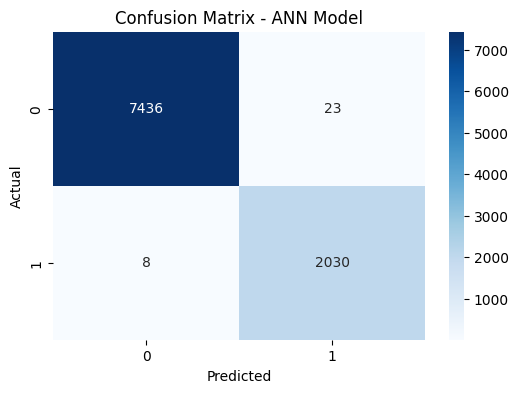

In [ ]:
# Plotting confusion matrix
y2_pred_prob = model1.predict(X2_test)
y2_pred = (y2_pred_prob >= 0.5).astype(int)
cm2 = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - ANN Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/tmp/ipython-input-649182002.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')


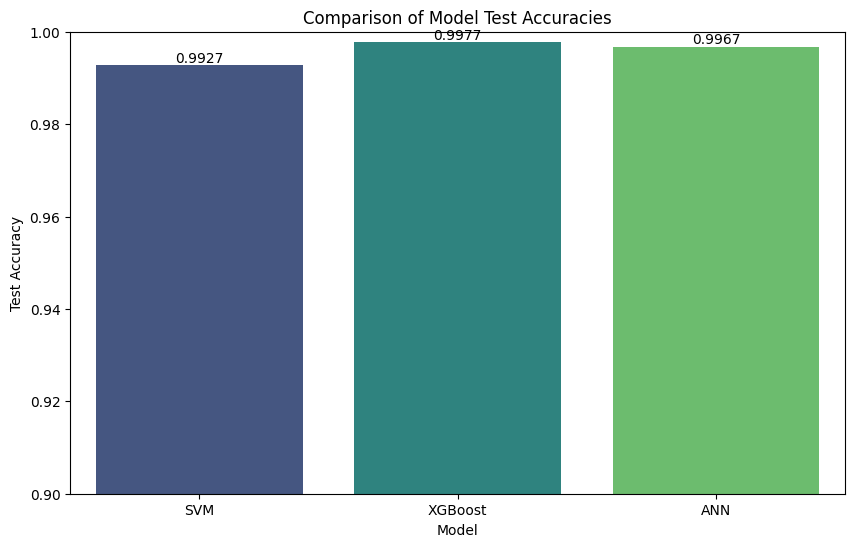

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score

# Get accuracy scores for each model
svm_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy = accuracy_score(y1_test, y1_pred)
ann_accuracy = test_acc

# Create a DataFrame for comparison
model_comparison = pd.DataFrame({
    'Model': ['SVM', 'XGBoost', 'ANN'],
    'Accuracy': [svm_accuracy, xgb_accuracy, ann_accuracy]
})

# Plot the comparison
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=model_comparison, palette='viridis')
plt.title('Comparison of Model Test Accuracies')
plt.ylim(0.9, 1.0) # Set y-axis limit for better comparison of high accuracies
plt.ylabel('Test Accuracy')
plt.xlabel('Model')

# Add exact accuracy values above each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f')

plt.show()